# Abgetastetes Cosinus-Signal

Ein Cosinussignal $u(t)=cos(2\pi f_0 t)$ werde mit der Abtastrate $f_S$ abgetastet. $f_0$  und $f_S$ sind einstellbar. Im oberen Graphen ist die Lage der Abtastwerte dargestellt, im unteren Graphen werden die Abtastwerte dargestellt sowie die Cosinusfunktion mit der niedrigsten Frequenz, die alle Punkte verbindet.

*Tipp: Die Graphen sind recht schmal voreingestellt, um auf kleinen Tablets sichtbar zu sein. Verwenden Sie das graue Dreieck, um sie zu vergrößern*


Output()

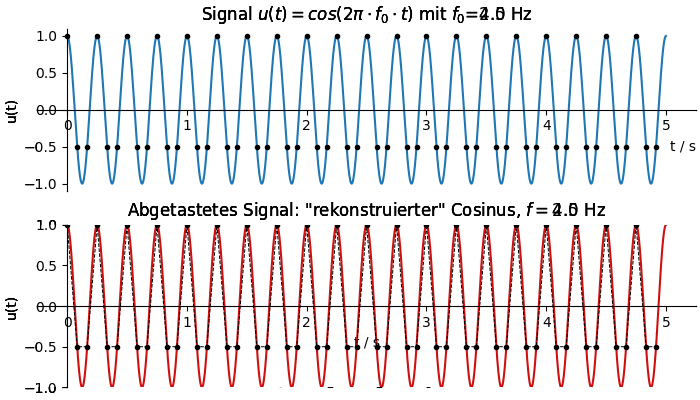

In [3]:
# (c) Benno Dömer, HS Pforzheim 2024
import platform
if platform.system() == "Emscripten": # running in JupyterLite
    %pip install -r runtime-requirements.txt

%matplotlib widget 

import numpy as np
from numpy import (pi, sqrt, sin, cos, fft, arange, zeros, ones, sinc, remainder) 
import matplotlib.pyplot as plt
from scipy import signal
import ipywidgets as widgets # interaktive Controls wie Slider, Dropdowns etc.

def myplotstyle(ax): # Hilfsfunktion, hübscht den Plot etwas auf
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    
figs, axs = plt.subplots(2,1,figsize=(7, 4), dpi=100, layout='constrained',num='Signal')

def plotdata(f0, fs): # wird bei Interaktion aufgerufen
    f_basis = remainder(f0,fs)
    if(f_basis < fs/2): # kein Aliasing
        f_alias = f_basis;
    else:
        f_alias = abs(f_basis - fs);

    t_orig = arange(0,5,0.001) # "Original"-Abtastrate: 1000 Hz
    t_abgetastet = arange(0,5,1/fs)
    
    cos_orig = cos(2*pi*f0*t_orig);
    cos_alias = cos(2*pi*f_alias*t_orig);

    cos_abgetastet = cos(2*pi*f0*t_abgetastet)
    ax=axs[0]
    ax.cla()
    ax.plot(t_orig,cos_orig)
    ax.plot(t_abgetastet,cos_abgetastet,'.k')
    ax.set_title(F'Signal $u(t)=cos(2\\pi\\cdot f_0\\cdot t)$ mit $f_0$={f0:.1f} Hz')
    ax.set_xlabel('t / s',loc='right')
    ax.set_ylabel('u(t)')
    myplotstyle(ax)
    
    ax=axs[1]
    ax.cla()
    ax.plot(t_orig,cos_alias,color='#CF1010')
    ax.plot(t_abgetastet,cos_abgetastet,'--.k',linewidth=0.7)
    #ax.plot(t_abgetastet,cos_abgetastet,'.k')
    
    ax.set_title(F'Abgetastetes Signal: "rekonstruierter" Cosinus, $f=${f_alias:.1f} Hz')
    ax.set_xlabel('t / s')
    ax.set_ylabel('u(t)')
    ax.set_ylim(-1,1)
    myplotstyle(ax)
    
    figs.canvas.draw()
    
# Interaktion: 
# Definition von Controls: 
#typecombo = widgets.Dropdown(options=[('EKG','ecg'),('Sinus','sin')],value='ecg',description='Signal')
fslider  = widgets.FloatSlider(min=0.5, max=10, step=0.1, value=4, continuous_update=True, description='$f_0$')
fsslider  = widgets.FloatSlider(min=0.5, max=25, step=0.1, value=12, continuous_update=True, description='$f_s$ / Hz')

# Arrangieren in horizontaler Box:
ui1 = widgets.HBox([fslider, fsslider])
#ui1.layout = widgets.Layout( border='solid 2px red')
# Verknüpfen mit Callback
#out = widgets.interactive_output(plotdata, { 'ftype': typecombo,'f': fslider, 'fsn':fsslider,'z':zoomcb}) 
out = widgets.interactive_output(plotdata, { 'f0':fslider, 'fs':fsslider}) 
#Anzeigen
display(ui1,out)
plt.figure(figs)
plt.show()